## Librerías

In [2]:
import pandas as pd
import my_utils as ut

## Metodología de Trabajo

En este archivo se utilizarán diversas librerías de Python que nos permiten realizar un análisis general y exhaustivo del dataset. Esto incluye métricas para la calidad de los datos, así como algunas gráficas que nos permitirán entender mejor los datos con los que estamos trabajando. Todos los hallazgos relevantes obtenidos en este notebook serán luego presentados de forma más ordenada en un reporte en formato MarkDown.

## Exploración Inicial del Dataset

Instanciamos el .csv creado en el archivo 'ETL.ipynb' y revisamos su contenido para verificar que la información es la correcta.

In [3]:
df = pd.read_csv('data/taylor_swift_spotify.csv')
df.head()

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,album_id,album_name,album_release_date,album_total_tracks,artist_id,artist_name,artist_popularity
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120


Ahora corroboramos el número de filas y columnas de nuestro dataframe. Esta información será parte del primer apartado del reporte que elaboraremos, en el que detallamos la metadata e información general de nuestro dataframe. El método `shape()` nos retorna una tupla con el número de filas y columnas de nuestro dataframe.

* Filas (Entradas): 575
* Columnas (Dimensiones): 27

In [29]:
filas_df = df.shape[0]
columnas_df = df.shape[1]

print(f'''El dataframe tiene:
    * Filas: {filas_df}
    * Columnas: {columnas_df}
      ''')

El dataframe tiene:
    * Filas: 575
    * Columnas: 27
      


### Métricas de Evaluación de Calidad

Conociendo el tamaño de las dimensiones de nuestro dataframe, podemos evaluar la calidad del mismo mediante las métricas de completitud y unicidad. Para la primera métrica evaluaremos el porcentaje de campos nulos con respecto al total de campos de nuestro dataset. Para la segunda evaluaremos el porcentaje de filas únicas con respecto al total de filas del dataset.

#### Completitud

Para calcular la completitud del dataset podemos usar la siguiente formula matemática:

$$
Completitud = \frac{\text{Campos no faltantes}}{\text{Campos totales}}*100
$$

Con el fin de conocer la cantidad de campos no faltantes podemos usar el método `notna()` de pandas en conjunción con el método `sum()`. `notna()` nos retorna un dataframe booleano con las mismas dimensiones del original asignando **True** a los valores no nulos y **False** a los nulos. Si utilizamos la función `sum()` en este dataframe 2 veces, estaremos sumando ambas dimensiones del dataframe (Filas y columnas), lo cual nos retornará el número total de **Campos no nulos**.

In [19]:
campos_notna = df.notna().sum().sum()
print(f'El número de campos no nulos del dataframe es: {campos_notna}')

El número de campos no nulos del dataframe es: 15436


Ahora para hallar el número de campos totales solo debemos multiplicar las filas por las columnas de nuestro dataframe.

In [31]:
campos_totales = filas_df * columnas_df
print(f'El número de campos totales del dataframe es de: {campos_totales}')

El número de campos totales del dataframe es de: 15525


Reemplazando las variables obtenemos la siguiente formula:

$$
Completitud = \frac{15436}{15525}*100
$$

In [55]:
completitud_df = round((campos_notna/campos_totales) * 100, 2)
print(f'El dataframe está un {completitud_df}% completo')

El dataframe está un 99.43% completo


Finalmente podemos obtener el número de campos nulos restando los totales menos los faltantes.

In [40]:
nulos_df = campos_totales - campos_notna
print(f'El número de campos nulos en el dataframe es de: {nulos_df}')

El número de campos nulos en el dataframe es de: 89


#### Unicidad

Para calcular la unicidad podemos usar la siguiente fórmula matemática:

$$
Unicidad = \frac{\text{Filas no duplicadas}}{\text{Filas totales}}*100
$$

Para calcular el número de filas no duplicadas restaremos a las 575 filas de nuestro dataframe, el número de filas duplicadas. Para encontrar el número de filas duplicadas podemos usar una máscara booleana para filtrar nuestro dataframe mediante el método `duplicated()`, este método retorna un arreglo booleano con dimensiones (575, 1). Si aplicamos este arreglo como una máscara a nuestro dataframe original filtraremos las filas que están duplicadas. Finalmente, con la función `len()` calculamos el número de filas en nuestro dataframe filtrado, retornando así el número de filas duplicadas.

In [48]:
filas_duplicadas = len(df[df.duplicated()])
filas_no_duplicadas = filas_df - filas_duplicadas
print(f'El número de filas no duplicadas es de: {filas_no_duplicadas}')

El número de filas no duplicadas es de: 521


Reemplazando los valores obtenemos la siguiente fórmula:

$$
Unicidad = \frac{521}{575}*100
$$

In [58]:
unicidad = round((filas_no_duplicadas/filas_df) * 100,2)
print(f'El dataframe contiene un {unicidad}% de filas únicas')

El dataframe contiene un 90.61% de filas únicas


In [3]:
df.describe()

,disc_number,duration_ms,track_number,track_popularity,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature,artist_popularity
count,575.000000,575.000000,575.000000,575.000000,573.000000,573.000000,574.000000,573.000000,575.000000,574.000000,574.000000,574.000000,575.000000,574.000000,574.000000,575.0
mean,1.029565,234136.991304,11.168696,64.113043,0.591702,0.571316,4.571429,-7.551590,0.911304,0.060306,0.337551,0.160293,0.403609,122.212749,3.987805,120.0
std,0.169532,54527.342619,7.832372,22.323237,0.121243,0.192651,3.327544,2.894911,0.284551,0.076884,0.392383,0.138498,0.199124,31.119316,0.191050,0.0
min,1.000000,-223093.000000,1.000000,-92.000000,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540,0.033500,0.037400,68.097000,3.000000,120.0
25%,1.000000,207440.000000,5.000000,52.500000,0.519000,0.435000,2.000000,-9.375000,1.000000,0.030825,0.034850,0.094800,0.238500,96.068500,4.000000,120.0
50%,1.000000,231706.000000,10.000000,70.000000,0.599000,0.589000,5.000000,-7.031000,1.000000,0.039050,0.163000,0.115000,0.397000,118.962000,4.000000,120.0
75%,1.000000,256741.500000,15.000000,78.000000,0.664000,0.725000,7.000000,-5.398000,1.000000,0.057250,0.664000,0.158000,0.539000,143.950000,4.000000,120.0
max,2.000000,613026.000000,46.000000,152.000000,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000,0.931000,0.943000,208.918000,5.000000,120.0


In [4]:
ut.null_review(df)


Total rows:  575

Total full null rows:  0

Total duplicated rows: 54


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,disc_number,[<class 'int'>],100.00,575,0.00,0
1,duration_ms,[<class 'int'>],100.00,575,0.00,0
2,explicit,[<class 'str'>],100.00,575,0.00,0
3,track_number,[<class 'int'>],100.00,575,0.00,0
4,track_popularity,[<class 'int'>],100.00,575,0.00,0
5,track_id,[<class 'str'>],98.61,567,1.39,8
6,track_name,[<class 'str'>],98.78,568,1.22,7
7,audio_features.danceability,[<class 'float'>],99.65,573,0.35,2
8,audio_features.energy,[<class 'float'>],99.65,573,0.35,2
9,audio_features.key,[<class 'float'>],99.83,574,0.17,1


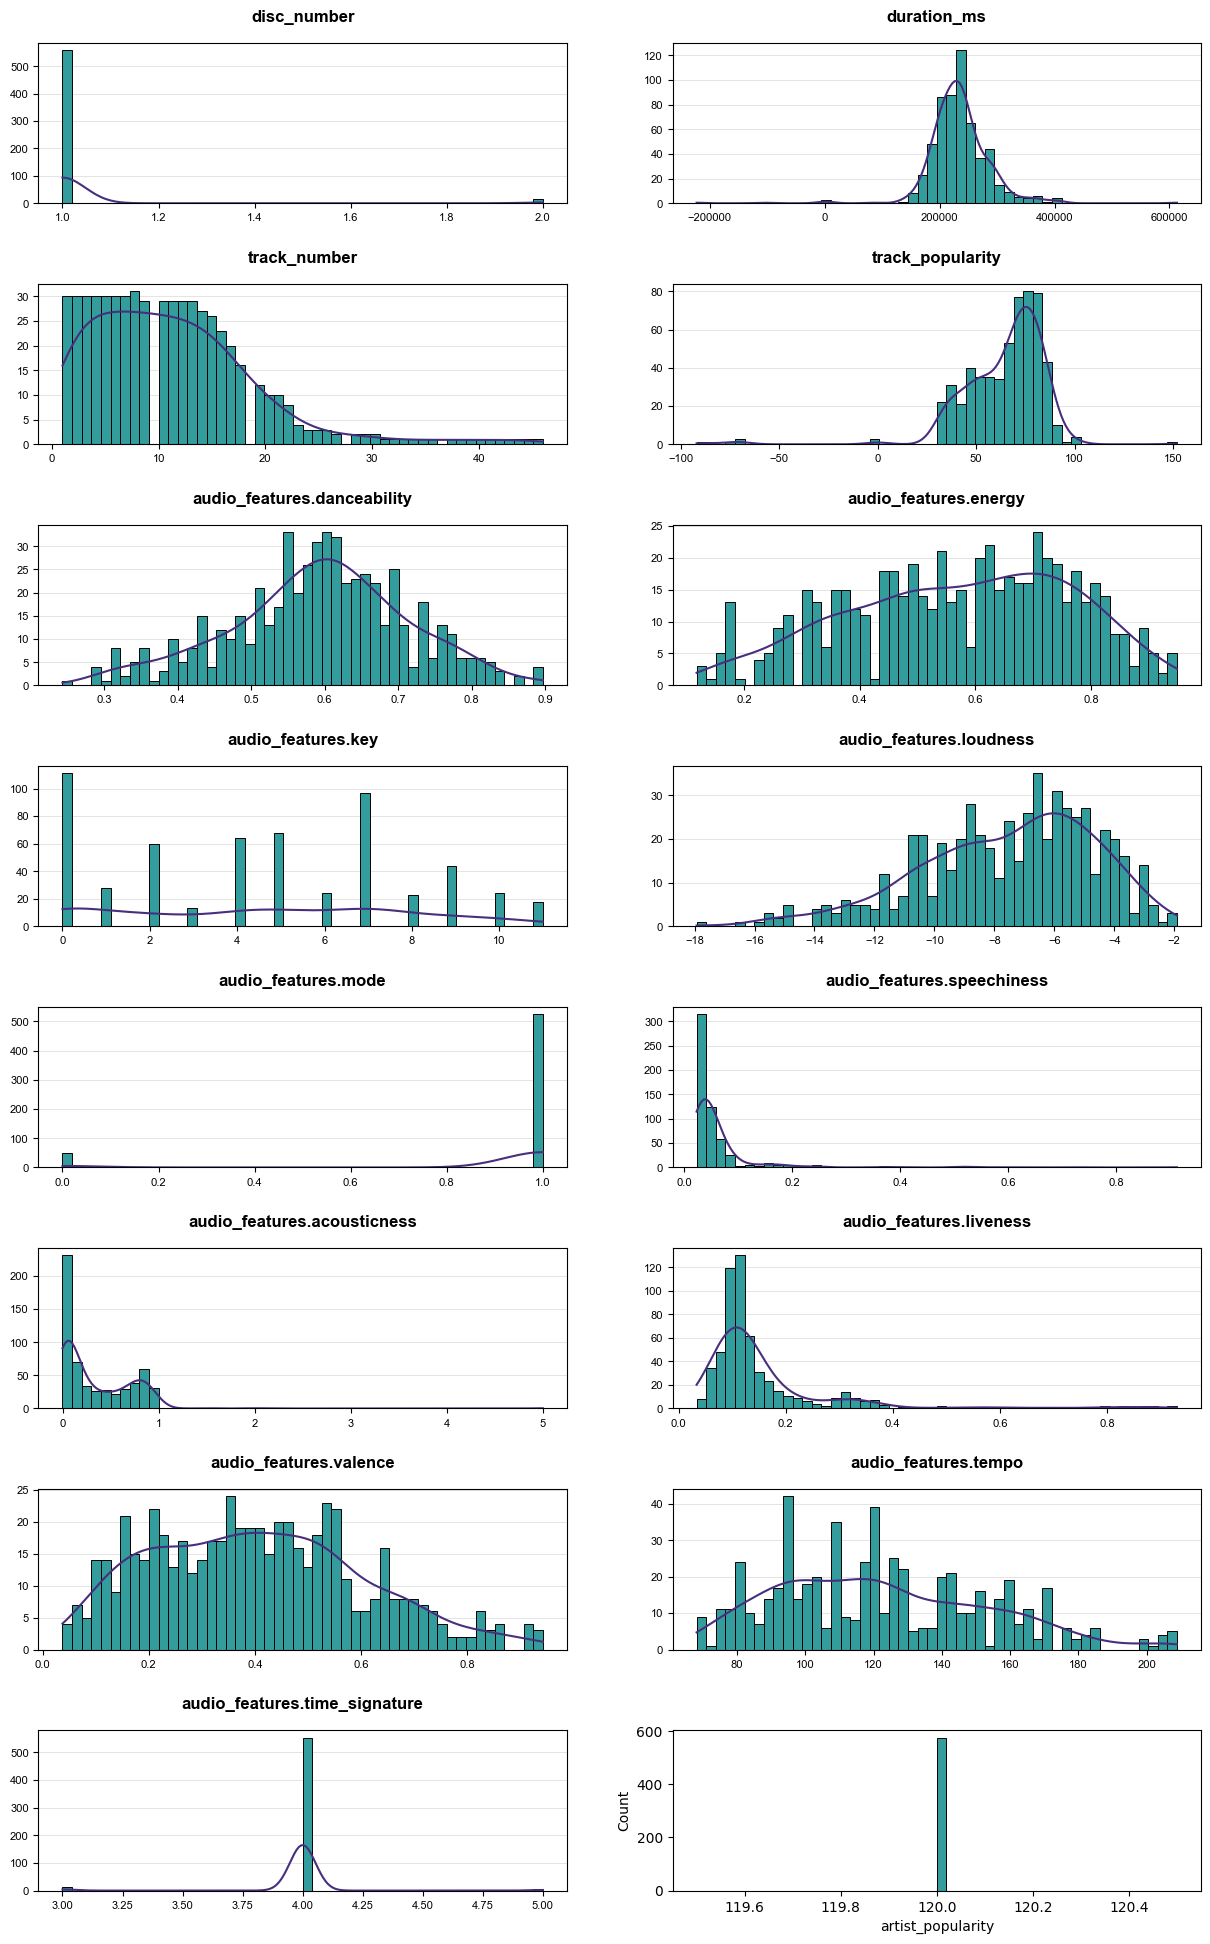

In [4]:
ut.multiHist('data_histograms', df)